In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
QSO_name = 'PG1522+101'

In [3]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/' + QSO_name + '/FUV/'

In [4]:
spec = fits.open(rootdir + 'PG1522+101_FUV_wavecal_new.fits')
nodes = fits.open(rootdir + 'PG1522+101_FUV_wavecal_new_nodes.fits')
ids = fits.open(rootdir + 'PG1522+101_FUV_wavecal_new_identifications.fits')

In [5]:
spec[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   88 / length of dimension 1                          
NAXIS2  =                58088 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   11 / number of table fields                         
TTYPE1  = 'wave    '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'error   '        

In [8]:
spec[1].data

FITS_rec([(1152.05551394, 3.69323856e-15, 1.58338365e-15, 1.47180392e-15, 1.47180392e-15, 0., 0., 0., 0., 1, 4.37398012e-15),
          (1152.06548394, 4.22419469e-15, 1.39478436e-15, 8.74409105e-16, 8.74409105e-16, 0., 0., 0., 0., 1, 4.37182723e-15),
          (1152.07545394, 2.85163869e-15, 1.21230785e-15, 1.41946470e-15, 1.41946470e-15, 0., 0., 0., 0., 1, 4.36970248e-15),
          ...,
          (1801.58506513, 1.49286965e-15, 2.85129742e-15, 0.00000000e+00, 0.00000000e+00, 0., 0., 0., 0., 0, 6.03925701e-15),
          (1801.59729513, 5.82346341e-15, 3.89925966e-15, 0.00000000e+00, 0.00000000e+00, 0., 0., 0., 0., 0, 6.04428744e-15),
          (1801.60952513, 2.87470573e-15, 3.29534855e-15, 0.00000000e+00, 0.00000000e+00, 0., 0., 0., 0., 0, 6.04933219e-15)],
         dtype=(numpy.record, [('wave', '>f8'), ('flux', '>f8'), ('error', '>f8'), ('error_u', '>f8'), ('error_d', '>f8'), ('counts_total', '>f8'), ('counts_net', '>f8'), ('npix', '>f8'), ('exptime', '>f8'), ('mask', '>i8'), ('c

In [6]:
spec_arr = pd.DataFrame(spec[1].data).to_numpy()

wav = spec_arr[:,0]
flux = spec_arr[:,1]
err = spec_arr[:,2]

In [10]:
flux[flux>=10**(-12)]

array([1.06769054e-12, 1.12319370e-12, 1.20460127e-12, 1.26996528e-12,
       1.34222732e-12, 1.39047092e-12, 1.46861293e-12, 1.54870374e-12,
       1.61649254e-12, 1.68168170e-12, 1.75671555e-12, 1.82436556e-12,
       1.87691287e-12, 1.95208747e-12, 2.00704839e-12, 2.09312636e-12,
       2.14433531e-12, 2.20137997e-12, 2.25284862e-12, 2.28870386e-12,
       2.35530526e-12, 2.41936347e-12, 2.42849523e-12, 2.46576058e-12,
       2.50992439e-12, 2.55382661e-12, 2.59633112e-12, 2.65838068e-12,
       2.67720719e-12, 2.71162890e-12, 2.72159345e-12, 2.72269129e-12,
       2.74037100e-12, 2.75668380e-12, 2.77341550e-12, 2.76079778e-12,
       2.75383979e-12, 2.75272165e-12, 2.77117560e-12, 2.74742045e-12,
       2.75681153e-12, 2.75276860e-12, 2.75852084e-12, 2.75736638e-12,
       2.74687435e-12, 2.73495405e-12, 2.74036901e-12, 2.73994987e-12,
       2.73291860e-12, 2.72104328e-12, 2.69824992e-12, 2.68101257e-12,
       2.65432481e-12, 2.63154920e-12, 2.59958941e-12, 2.56222466e-12,
      

Text(0, 0.5, 'Flux (ergs/cm^2/s)')

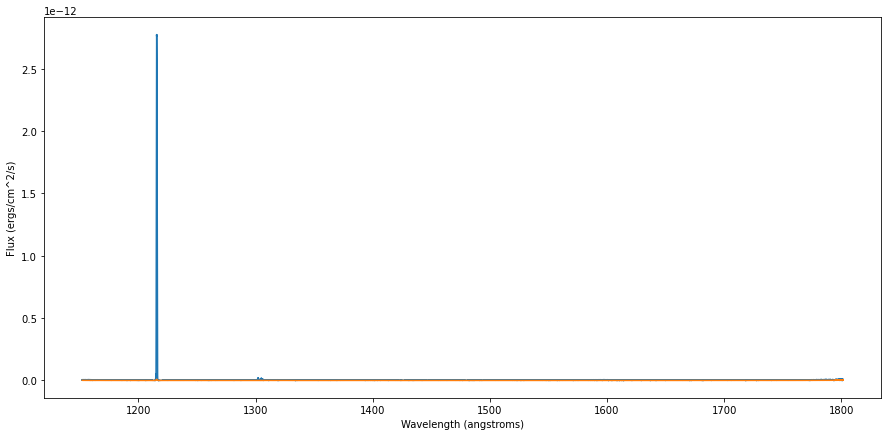

In [7]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav, flux)
ax.plot(wav, err)

ax.set_xlabel('Wavelength (angstroms)')
ax.set_ylabel('Flux (ergs/cm^2/s)')

Load in the continuum nodes

In [8]:
cont_arr = pd.DataFrame(nodes[1].data).to_numpy()

cont_wav = cont_arr[:,0]
cont_flux = cont_arr[:,1]

Delete any continuum values that are exactly zero

In [9]:
cont_idx = cont_flux!=0

cont_wav = cont_wav[cont_idx]
cont_flux = cont_flux[cont_idx]

In [10]:
cont_flux_interp = np.interp(wav, cont_wav, cont_flux)

Continuum normalize the flux and error

In [11]:
flux_norm = flux/cont_flux_interp
err_norm = err/cont_flux_interp

Text(0, 0.5, 'Flux (ergs/cm^2/s)')

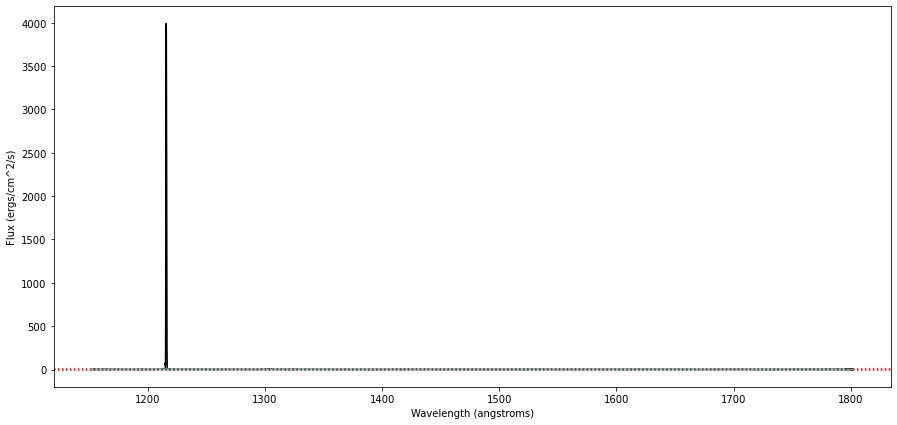

In [12]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav, flux_norm, color='black')
ax.plot(wav, err_norm, color='cyan')
ax.axhline(0, color='red', linestyle=':')
ax.axhline(1, color='red', linestyle=':')


ax.set_xlabel('Wavelength (angstroms)')
ax.set_ylabel('Flux (ergs/cm^2/s)')

Grab line identifications

In [13]:
ids[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  187 / length of dimension 1                          
NAXIS2  =                  333 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   24 / number of table fields                         
TTYPE1  = 'ion     '                                                            
TFORM1  = '10A     '                                                            
TTYPE2  = 'draw    '                                                            
TFORM2  = 'L       '                                                            
TTYPE3  = 'system_id'       

In [14]:
ids_arr = pd.DataFrame(ids[1].data).to_numpy()

In [15]:
ids_arr

array([['NV', True, 1, ..., 0.077, 0, 0],
       ['NV', True, 1, ..., 0.15700000524520874, 0, 1],
       ['SiIV', True, 1, ..., 0.527999997138977, 0, 0],
       ...,
       ['NeVIII', True, 121, ..., 0.05050000175833702, 0, 0],
       ['NeVIII', True, 121, ..., 0.103, 0, 0],
       ['NeIV', True, 121, ..., 0.17, 0, 1]], dtype=object)

In [44]:
ids_arr[0]

array(['NV', True, 1, 1242.804, -0.0002005381646161819, 0.0,
       1242.5547703668624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0, 0.077, 0, 0], dtype=object)

In [16]:
len(ids_arr)

333

Do velocity calibration for one line

In [17]:
idx = 0

In [18]:
wav_0 = ids_arr[idx][6]

In [19]:
del_wav = wav-wav_0

In [20]:
c = 3*10**5 #km per sec

In [21]:
v = c*del_wav/wav_0

In [22]:
plot_idx = (v>-200) & (v<200)

In [23]:
import matplotlib as mpl
from matplotlib import rc

In [24]:
#plt.style.use('science.mplstyle')

Use Computer Modern

Text(0.5, 1.0, 'NV, z = -0.0002')

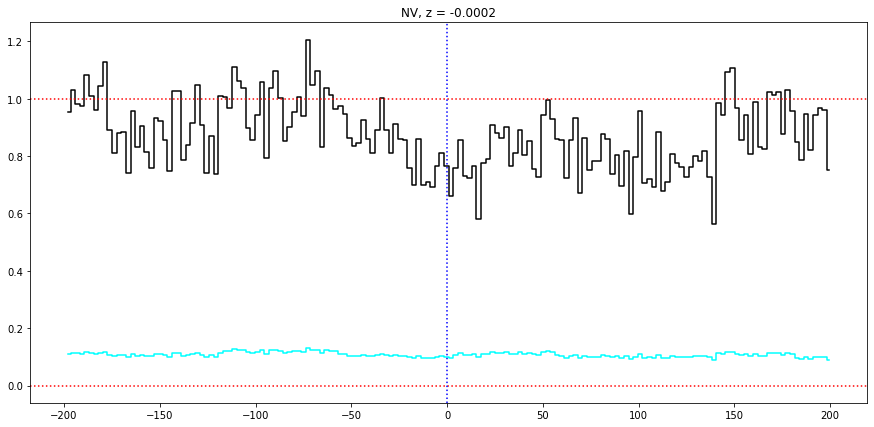

In [25]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.step(v[plot_idx], flux_norm[plot_idx], color='black', where='mid')
ax.step(v[plot_idx], err_norm[plot_idx], color='cyan', where='mid')

ax.axhline(0, color='red', linestyle=':')
ax.axhline(1, color='red', linestyle=':')

ax.axvline(0, color='blue', linestyle=':')

ax.set_title(ids_arr[idx][0] + ', z = ' + str(round(ids_arr[idx][4], 4)))

Plotting system 121

In [47]:
sys_idx = 121

In [40]:
sys_idx_arr = np.float_(ids_arr[:,2])

In [41]:
idx_arr = np.where(sys_idx_arr==sys_idx)[0]

In [50]:
idx_arr = [idx for idx in idx_arr if ids_arr[idx][23]==0]

In [51]:
for idx in idx_arr:
    print(ids_arr[idx])

['OIV' True 121 787.711 1.27782 0.0 1794.2638700200002 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.11 0 0]
['OIII' True 121 507.388 1.27782 0.0 1155.73853416 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.186 0 0]
['OIII' True 121 702.332 1.27782 0.0 1599.78587624 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.137 0 0]
['OV' True 121 629.73 1.27782 0.0 1434.4115886000002 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.515 0 0]
['NIV' True 121 765.147 1.27782 0.0 1742.8671395400002 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.611 0 0]
['OIV' True 121 608.398 1.27782 0.0 1385.82113236 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.067 0 0]
['OIV' True 121 554.076 1.27782 0.0 1262.0853943200002 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.224 0 0]
['NeVIII' True 121 780.323974609375 1.27782 0.0 1777.4375558447266 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1 0.05050000175833702 0 0]
['NeVIII' True 121 770

In [62]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

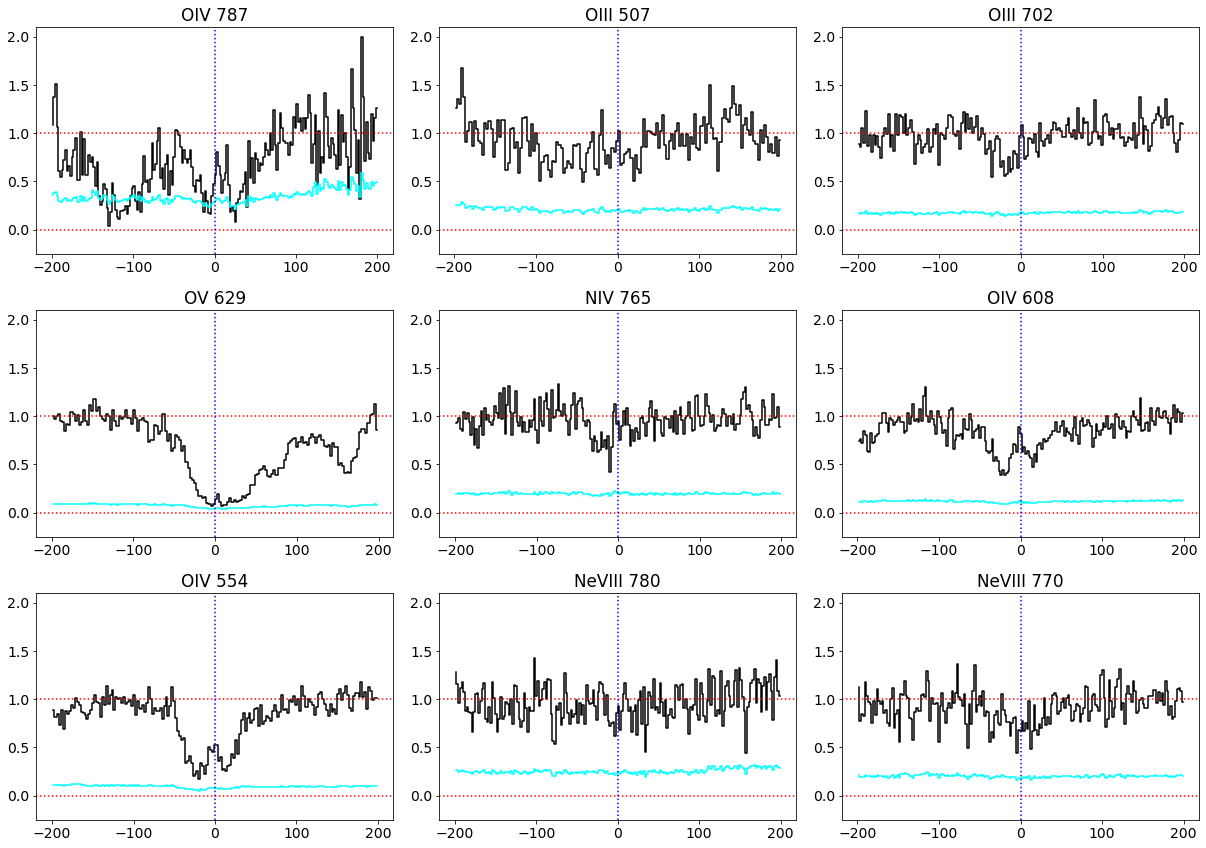

In [68]:
if(len(idx_arr)>1):
    
    fig, axes = plt.subplots(3, 3, figsize=(17, 12))

    for i in range(len(idx_arr)):

        idx = idx_arr[i]

        wav_0 = ids_arr[idx][6]
        del_wav = wav-wav_0
        v = c*del_wav/wav_0

        ax = axes[i//3, i%3]

        plot_idx = (v>-200) & (v<200)

        ax.step(v[plot_idx], flux_norm[plot_idx], color='black', where='mid')
        ax.step(v[plot_idx], err_norm[plot_idx], color='cyan', where='mid')

        ax.axhline(0, color='red', linestyle=':')
        ax.axhline(1, color='red', linestyle=':')

        ax.axvline(0, color='blue', linestyle=':')

        ax.set_title(ids_arr[idx][0] + ' ' + str(int(ids_arr[idx][3])))
        
        ax.set_ylim(-.25,2.1)

        
else:
    
    fig, ax = plt.subplots(1, figsize=(15, 7))
    
    idx = idx_arr[0]

    wav_0 = ids_arr[idx][6]
    
    del_wav = wav-wav_0
    v = c*del_wav/wav_0
    
    plot_idx = (v>-200) & (v<200)

    ax.step(v[plot_idx], flux_norm[plot_idx], color='black', where='mid')
    ax.step(v[plot_idx], err_norm[plot_idx], color='cyan', where='mid')

    ax.axhline(0, color='red', linestyle=':')
    ax.axhline(1, color='red', linestyle=':')

    ax.axvline(0, color='blue', linestyle=':')

    ax.set_title(ids_arr[idx][0] + ', z = ' + str('{:0.4e}'.format(ids_arr[idx][4])))
    
plt.tight_layout()
plt.savefig('PG1522+101.pdf')

Calibrate velocities for any given system

In [39]:
sys_idx = 121

In [40]:
sys_idx_arr = np.float_(ids_arr[:,2])

In [41]:
idx_arr = np.where(sys_idx_arr==sys_idx)[0]

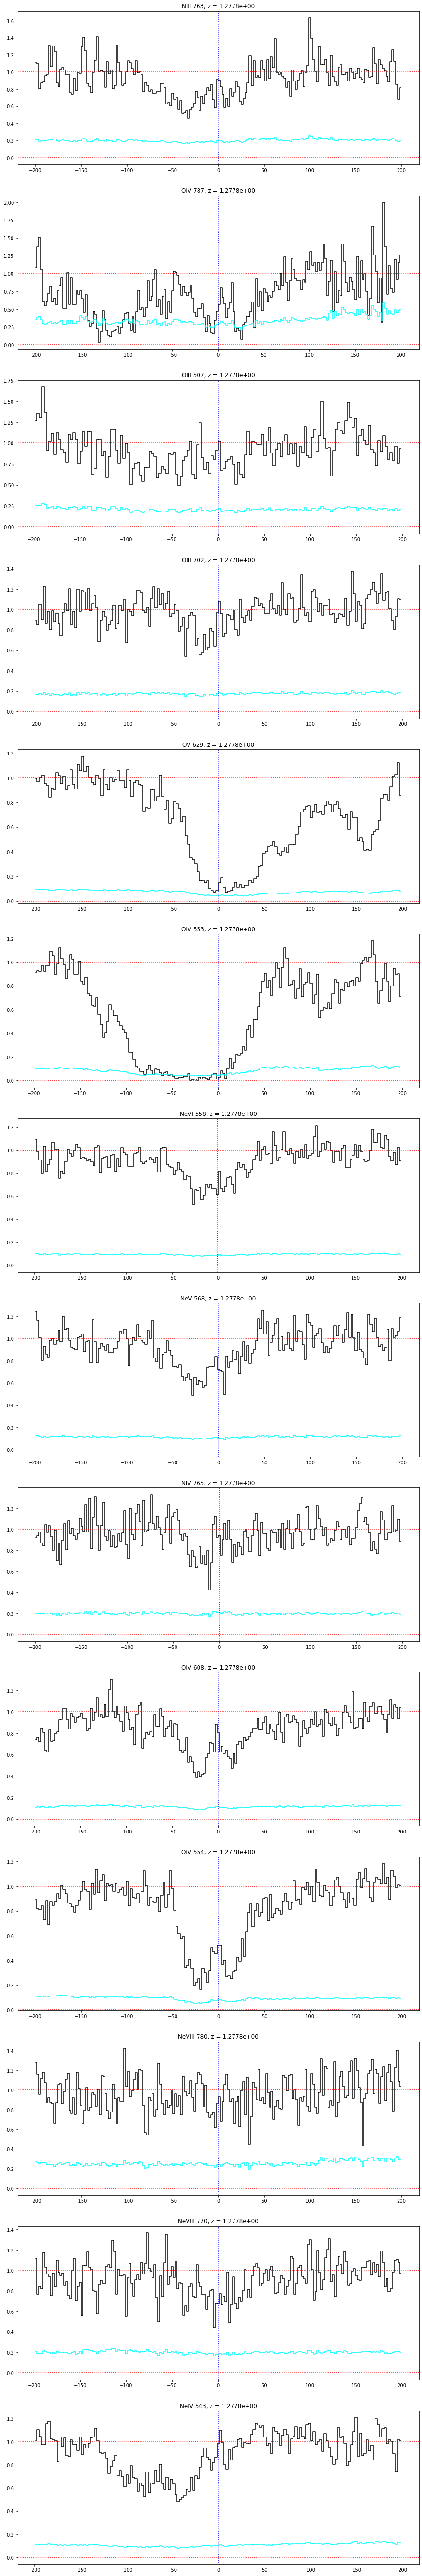

In [46]:
if(len(idx_arr)>1):
    
    fig, axes = plt.subplots(len(idx_arr), figsize=(15, 7*len(idx_arr)))

    for i in range(len(idx_arr)):

        idx = idx_arr[i]

        wav_0 = ids_arr[idx][6]
        del_wav = wav-wav_0
        v = c*del_wav/wav_0

        ax = axes[i]

        plot_idx = (v>-200) & (v<200)

        ax.step(v[plot_idx], flux_norm[plot_idx], color='black', where='mid')
        ax.step(v[plot_idx], err_norm[plot_idx], color='cyan', where='mid')

        ax.axhline(0, color='red', linestyle=':')
        ax.axhline(1, color='red', linestyle=':')

        ax.axvline(0, color='blue', linestyle=':')

        ax.set_title(ids_arr[idx][0] + ' ' + str(int(ids_arr[idx][3])) + ', z = ' + str('{:0.4e}'.format(ids_arr[idx][4])))
        
else:
    
    fig, ax = plt.subplots(1, figsize=(15, 7))
    
    idx = idx_arr[0]

    wav_0 = ids_arr[idx][6]
    
    del_wav = wav-wav_0
    v = c*del_wav/wav_0
    
    plot_idx = (v>-200) & (v<200)

    ax.step(v[plot_idx], flux_norm[plot_idx], color='black', where='mid')
    ax.step(v[plot_idx], err_norm[plot_idx], color='cyan', where='mid')

    ax.axhline(0, color='red', linestyle=':')
    ax.axhline(1, color='red', linestyle=':')

    ax.axvline(0, color='blue', linestyle=':')

    ax.set_title(ids_arr[idx][0] + ', z = ' + str('{:0.4e}'.format(ids_arr[idx][4])))
    
plt.savefig('PG1522+101.pdf')

Calibrate velocities for a given line

In [35]:
line_name = 'NeVIII'

In [36]:
line_name_arr = list(ids_arr[:,0])

In [37]:
idx_arr = np.array([i for i in range(0, len(line_name_arr)) if line_name_arr[i]==line_name])

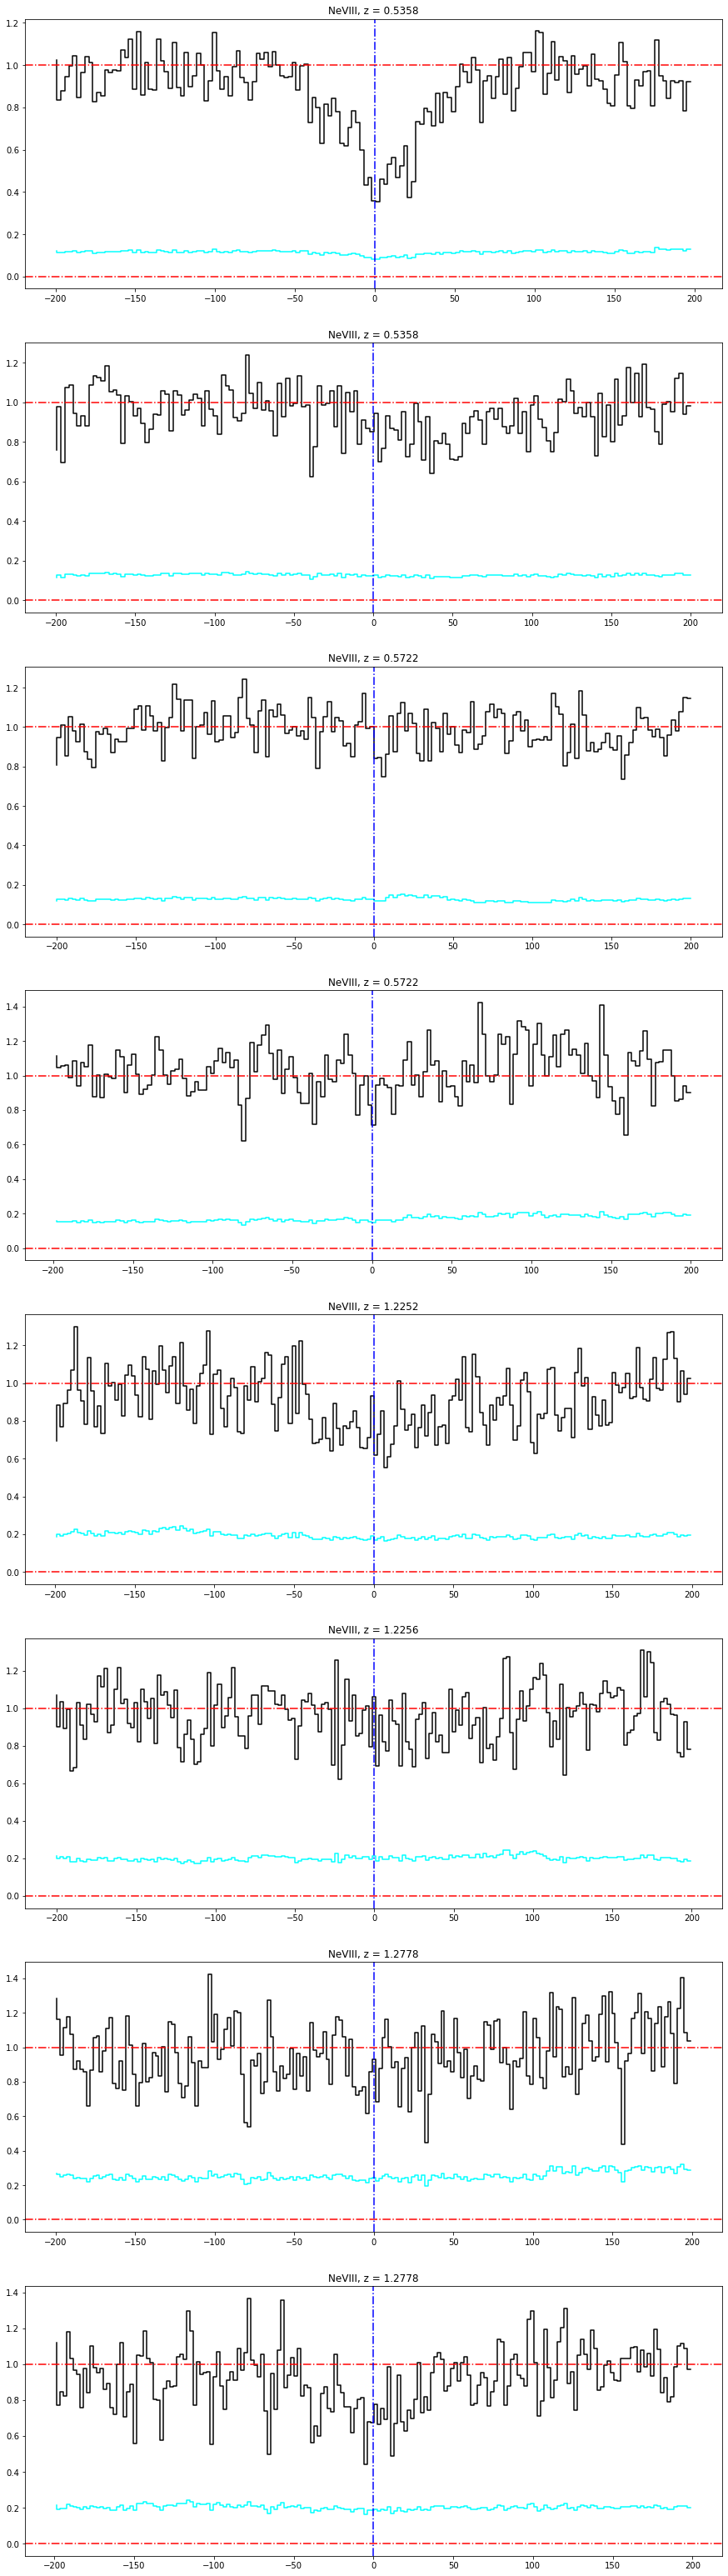

In [38]:
fig, axes = plt.subplots(len(idx_arr), figsize=(15, 7*len(idx_arr)))

for i in range(len(idx_arr)):
    
    idx = idx_arr[i]
    
    wav_0 = ids_arr[idx][6]
    del_wav = wav-wav_0
    v = c*del_wav/wav_0
    
    ax = axes[i]
    
    plot_idx = (v>-200) & (v<200)
    
    ax.step(v[plot_idx], flux_norm[plot_idx], color='black', label='mid')
    ax.step(v[plot_idx], err_norm[plot_idx], color='cyan', label='mid')

    ax.axhline(0, color='red', linestyle='-.')
    ax.axhline(1, color='red', linestyle='-.')

    ax.axvline(0, color='blue', linestyle='-.')

    ax.set_title(ids_arr[idx][0] + ', z = ' + str(np.round(ids_arr[idx][4], 4)))